In [26]:
!pip install opencv-python

     ---------------------------------------- 38.2/38.2 MB 9.2 MB/s eta 0:00:00


In [45]:
import os
import numpy as np
from scipy.cluster.vq import kmeans, vq
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [13]:
# Load all images in the directory
img_dir = r"C:\Users\fhacesga\Desktop\FIRMsDigitizing\data\\"
img_files = os.listdir(img_dir)

for img_file in img_files:
    # Load the image and convert it to a numpy array
    img_path = os.path.join(img_dir, img_file)
    img = Image.open(img_path)
    img_array = np.array(img)
    
    print(img_array.shape)
    
    # Flatten the image array
    # pixels = img_array.reshape((-1, 3)).astype(np.float)
    
    # Remove completely white pixels
    pixels = img_array[img_array != 255].astype(np.float64)
    
    # Perform K-means clustering
    k = 3
    centroids, labels = kmeans(pixels, k)
    print(labels)
    labels, _ = vq(img_array.flatten(), centroids)
    labels = labels.reshape(img_array.shape)
    
    # Replace white pixels in the original image with the segmented image
    clustered = np.ones_like(img_array) * 255
    clustered = np.where(labels != -1, labels, clustered)
    
    # Display the original image and its histogram
    #plt.imshow(img,cmap="Greys")
    # plt.title('Original Image')
    #plt.imshow(clustered)
    plt.histogram(img_array.flatten())
    
    plt.imshow()

(3766, 5474)
14.977685670318571


AttributeError: module 'matplotlib.pyplot' has no attribute 'histogram'

[  0. 255. 255.]


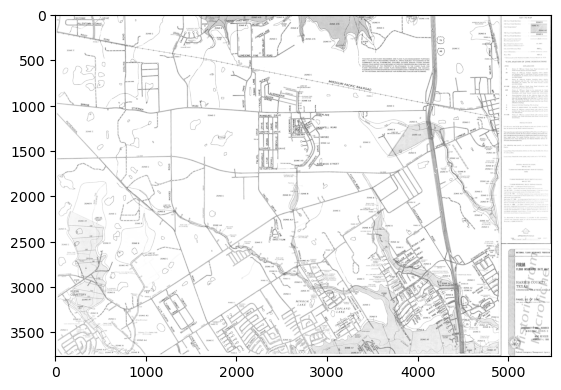

In [41]:
kernel = np.zeros((5,5), np.uint8)
kernel[2,2] = 1

plt.imshow(cv2.erode(img_array, kernel), cmap="Greys_r", vmin=0, vmax=255)


In [63]:
from scipy import ndimage

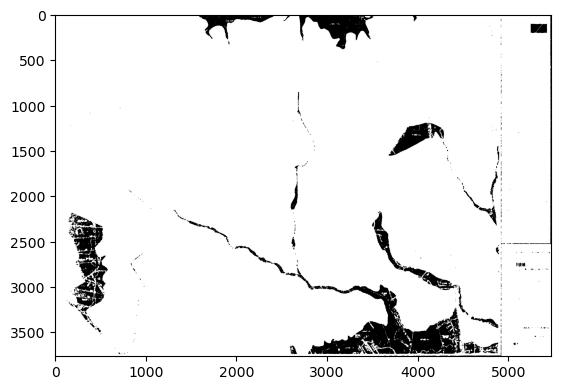

In [71]:
test = gaussian_filter(np.logical_and(img_array > 0, img_array < 250), sigma=0.4)
test = ndimage.median_filter(test, size=5)
test = ndimage.binary_dilation(test, np.ones((5,5)))
plt.imshow(test, cmap="Greys")

In [59]:
print(test)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [72]:
im = Image.fromarray(np.logical_not(test))
im.save("output1.png")